# 6.5. Machine Learning Part 2 - Unemployement in America

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [55]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [56]:
path = r'C:\Users\eminc\OneDrive\A  - Career Foundry\Data Immersion\A6 Advanced Analytics & Dashboard Design\6.0. - Project'

In [57]:
df = pd.read_csv(os.path.join(path, '6 - 02 Data', 'Prepared Data', 'Unemployment in America.csv'))

In [58]:
df.shape

(29892, 15)

In [59]:
df.head()

,FIPS Code,State/Area,Year,Month,Month/Year,Year/Month,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed,Unemployment Categories,Decades
0,1,Alabama,1976,1,1/1976,1976/1,2605000,1484555,57.0,1386023,53.2,98532,6.6,Mid Unemployment,1970s
1,2,Alaska,1976,1,1/1976,1976/1,232000,160183,69.0,148820,64.1,11363,7.1,Mid Unemployment,1970s
2,4,Arizona,1976,1,1/1976,1976/1,1621000,964120,59.5,865871,53.4,98249,10.2,High Unemployment,1970s
3,5,Arkansas,1976,1,1/1976,1976/1,1536000,889044,57.9,824395,53.7,64649,7.3,Mid Unemployment,1970s
4,6,California,1976,1,1/1976,1976/1,15621000,9774280,62.6,8875685,56.8,898595,9.2,High Unemployment,1970s


In [60]:
df.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month', 'Month/Year', 'Year/Month',
       'Population', 'Labor Force', 'LF % of Population', 'Employment',
       '% of Employed', 'Unemployment', '% of Unemployed',
       'Unemployment Categories', 'Decades'],
      dtype='object')

In [61]:
# Removing categorical columns

df1 = df[['Year', 'Population', 'Labor Force', 'LF % of Population', 'Employment',
       '% of Employed', 'Unemployment', '% of Unemployed']]

In [62]:
df1.shape

(29892, 8)

In [63]:
df1.head()

,Year,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed
0,1976,2605000,1484555,57.0,1386023,53.2,98532,6.6
1,1976,232000,160183,69.0,148820,64.1,11363,7.1
2,1976,1621000,964120,59.5,865871,53.4,98249,10.2
3,1976,1536000,889044,57.9,824395,53.7,64649,7.3
4,1976,15621000,9774280,62.6,8875685,56.8,898595,9.2


### Directions 1 and 2: Installed and imported all necessary libraries in my Jupyter notebook. Imported my already cleaned and renamed data. Removed any categorical coulumns from data, therefore created df1. Considered scale issue.

### 2. The elbow technique

In [64]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [65]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.1195685229075621e+18,
 -4.278174101296148e+17,
 -1.9450540914523674e+17,
 -1.175040650670039e+17,
 -6.224139894885158e+16,
 -4.424792358673934e+16,
 -3.2848511621468456e+16,
 -2.3791622177524504e+16,
 -1.9687582933534936e+16]

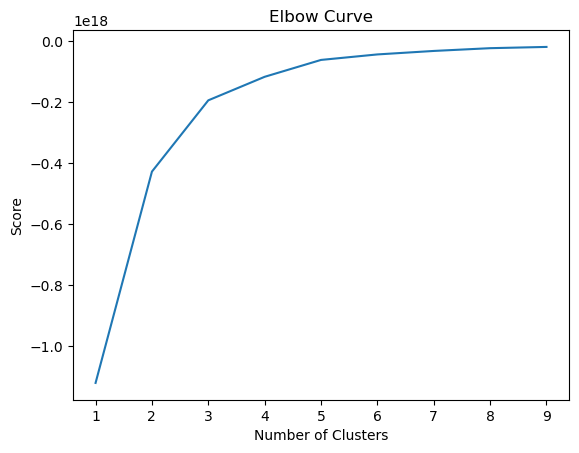

In [66]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### Directions 3 and 4: Based on the Cluster Chart decided to use 4 clusters in first attempt, but then reduced to 3, because more than 3 made the differentiation among the clusters impossible.

### 3. k-means clustering

In [67]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)


##### Fit the k-means object to the data.

kmeans.fit(df1)

In [68]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\eminc\AppData\Local\Temp\ipykernel_26948\865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [69]:
df1.head()

,Year,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed,clusters
0,1976,2605000,1484555,57.0,1386023,53.2,98532,6.6,1
1,1976,232000,160183,69.0,148820,64.1,11363,7.1,1
2,1976,1621000,964120,59.5,865871,53.4,98249,10.2,1
3,1976,1536000,889044,57.9,824395,53.7,64649,7.3,1
4,1976,15621000,9774280,62.6,8875685,56.8,898595,9.2,2


In [70]:
df1['clusters'].value_counts()

1    19077
0     9003
2     1812
Name: clusters, dtype: int64

### Directions 5 and 6: Ran the k-means algorithm. Attached a new column to my dataframe with the resulting clusters. 

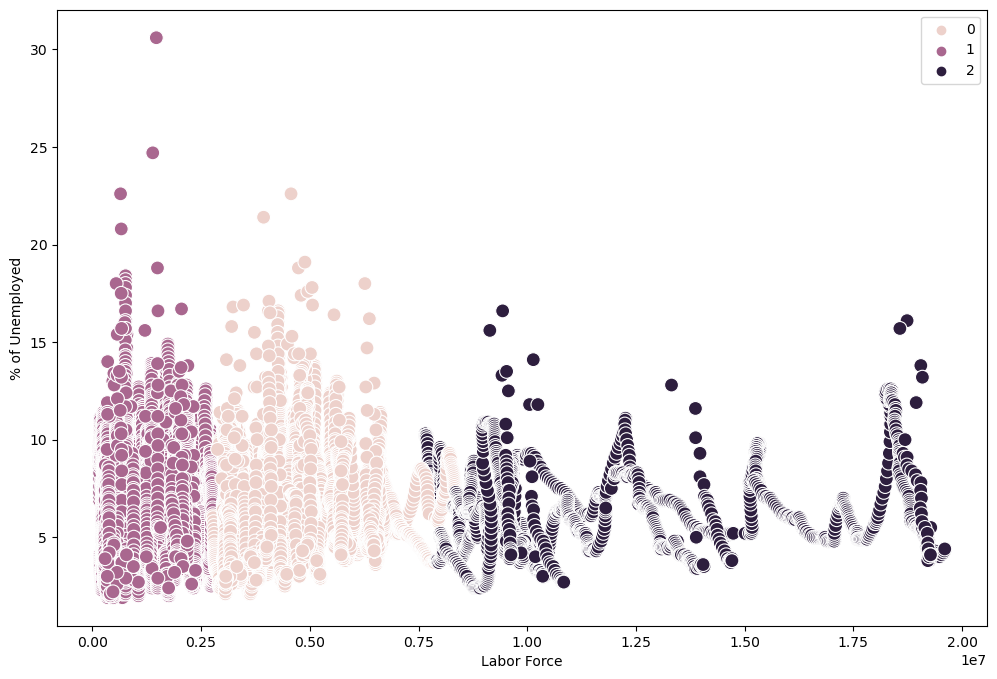

In [71]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Labor Force'], y=df['% of Unemployed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Labor Force') # Label x-axis.
plt.ylabel('% of Unemployed') # Label y-axis.
plt.show()

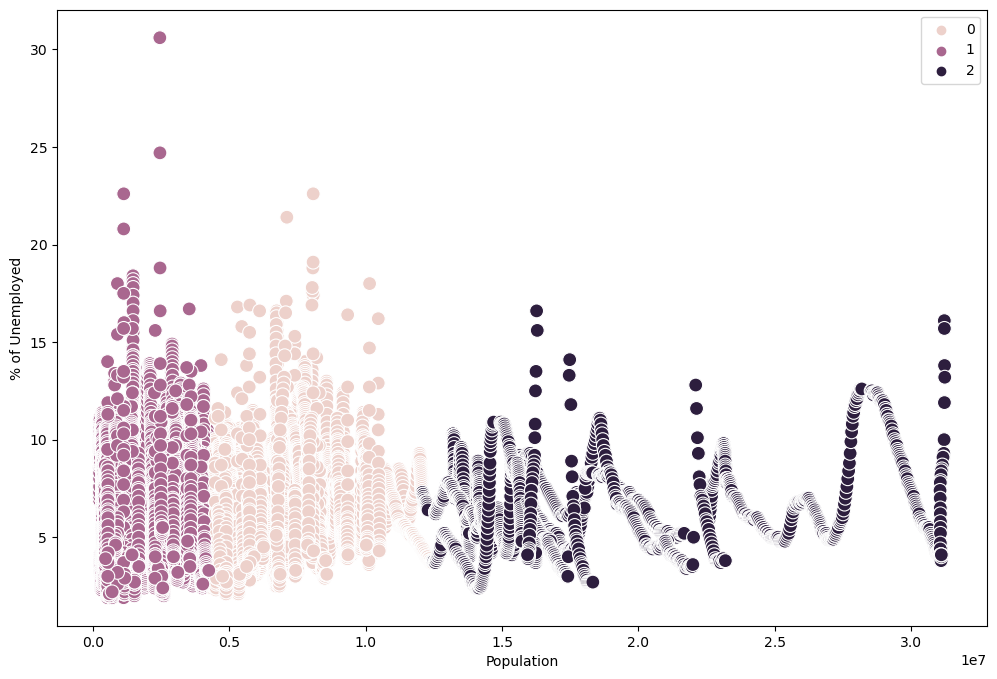

In [72]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Population'], y=df['% of Unemployed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Population') 
plt.ylabel('% of Unemployed') 
plt.show()

### Directions 7 and 8: Created two different visualizations (e.g., scatterplots) by using my clustered data. In the 1st scaterplot we see that Labor Force is clustered in 3 different ranges with certain % of Unemployed and the same for the second scaterplot. It is useful to know in which areas the Labor Force or Population effect Unemployment rate in America.

In [73]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\eminc\AppData\Local\Temp\ipykernel_26948\2078207149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'


In [74]:
df1.groupby('cluster').agg({'Labor Force':['mean', 'median'], 
                         'Population':['mean', 'median'], 
                         '% of Unemployed':['mean', 'median']})

Labor Force                Population              \
                     mean      median          mean      median   
cluster                                                           
dark purple  1.172494e+07  10060157.5  1.839422e+07  16189913.0   
pink         4.236170e+06   3971431.0  6.545816e+06   6129621.0   
purple       1.172386e+06   1013647.0  1.800394e+06   1598702.0   

            % of Unemployed         
                       mean median  
cluster                             
dark purple        6.422572    6.2  
pink               6.130412    5.6  
purple             5.774199    5.5

### Directions 9 and 10: Descriptive statistics for my clusters calculated by using groupby() function. These results can be used for further analytics only based on the clusters. It gives valuable insight about each cluster. 

In [75]:
df1.head()

,Year,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed,clusters,cluster
0,1976,2605000,1484555,57.0,1386023,53.2,98532,6.6,1,purple
1,1976,232000,160183,69.0,148820,64.1,11363,7.1,1,purple
2,1976,1621000,964120,59.5,865871,53.4,98249,10.2,1,purple
3,1976,1536000,889044,57.9,824395,53.7,64649,7.3,1,purple
4,1976,15621000,9774280,62.6,8875685,56.8,898595,9.2,2,dark purple


In [76]:
df1.shape

(29892, 10)

In [77]:
df1.columns

Index(['Year', 'Population', 'Labor Force', 'LF % of Population', 'Employment',
       '% of Employed', 'Unemployment', '% of Unemployed', 'clusters',
       'cluster'],
      dtype='object')

In [1]:
# df1.pop(State/Area)

In [ ]:
df1.to_csv(os.path.join(path, '6 - 02 Data', 'Prepared Data', 'Unemployment in America_states_missing.csv'))